# 1. Tinjauan Proyek: Prediksi Kelulusan Siswa

## 1.1. Latar Belakang Masalah
Kelulusan siswa merupakan indikator utama keberhasilan institusi pendidikan. Dengan memahami faktor-faktor yang memengaruhi kelulusan, sekolah dapat melakukan intervensi lebih dini dan efektif untuk meningkatkan angka kelulusan.

Proyek ini bertujuan membangun model *machine learning* untuk memprediksi kemungkinan siswa **lulus** berdasarkan data demografis, sosial, akademik, dan perilaku belajar.

## 1.2. Tujuan Analisis Data
* Mengidentifikasi faktor signifikan yang berkontribusi pada kelulusan siswa.
* Membangun model klasifikasi untuk memprediksi siswa yang berpotensi lulus.
* Memberikan rekomendasi intervensi berbasis data.

## 1.3. Task Analisis
Task utama adalah **Klasifikasi**: memetakan siswa ke dalam dua kategori, yaitu "**Lulus**" atau "**Tidak Lulus**".

## 1.4. Deskripsi Data
* **Sumber Data:** [UCI ML Repository: Higher Education Students Performance Evaluation Dataset](https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation)
* **Struktur Data:**  
  - 1. Student ID  
  - 2. Student Age (1: 18-21, 2: 22-25, 3: above 26)  
  - 3. Sex (1: female, 2: male)  
  - 4. Graduated high-school type: (1: private, 2: state, 3: other)  
  - 5. Scholarship type: (1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full)  
  - 6. Additional work: (1: Yes, 2: No)  
  - 7. Regular artistic or sports activity: (1: Yes, 2: No)  
  - 8. Do you have a partner: (1: Yes, 2: No)  
  - 9. Total salary if available (1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: above 410)  
  - 10. Transportation to the university: (1: Bus, 2: Private car/taxi, 3: bicycle, 4: Other)  
  - 11. Accommodation type in Cyprus: (1: rental, 2: dormitory, 3: with family, 4: Other)  
  - 12. Mothers’ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)  
  - 13. Fathers’ education: (1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.)  
  - 14. Number of sisters/brothers (if available): (1: 1, 2: 2, 3: 3, 4: 4, 5: 5 or above)  
  - 15. Parental status: (1: married, 2: divorced, 3: died - one of them or both)  
  - 16. Mothers’ occupation: (1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employment, 6: other)  
  - 17. Fathers’ occupation: (1: retired, 2: government officer, 3: private sector employee, 4: self-employment, 5: other)  
  - 18. Weekly study hours: (1: None, 2: <5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: more than 20 hours)  
  - 19. Reading frequency (non-scientific books/journals): (1: None, 2: Sometimes, 3: Often)  
  - 20. Reading frequency (scientific books/journals): (1: None, 2: Sometimes, 3: Often)  
  - 21. Attendance to the seminars/conferences related to the department: (1: Yes, 2: No)  
  - 22. Impact of your projects/activities on your success: (1: positive, 2: negative, 3: neutral)  
  - 23. Attendance to classes (1: always, 2: sometimes, 3: never)  
  - 24. Preparation to midterm exams 1: (1: alone, 2: with friends, 3: not applicable)  
  - 25. Preparation to midterm exams 2: (1: closest date to the exam, 2: regularly during the semester, 3: never)  
  - 26. Taking notes in classes: (1: never, 2: sometimes, 3: always)  
  - 27. Listening in classes: (1: never, 2: sometimes, 3: always)  
  - 28. Discussion improves my interest and success in the course: (1: never, 2: sometimes, 3: always)  
  - 29. Flip-classroom: (1: not useful, 2: useful, 3: not applicable)  
  - 30. Cumulative grade point average in the last semester (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)  
  - 31. Expected Cumulative grade point average in the graduation (/4.00): (1: <2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: above 3.49)  
  - 32. Course ID  
  - 33. OUTPUT Grade (0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA)  
* **Target Prediksi:** Lulus (OUTPUT Grade >= 3) atau Tidak Lulus (OUTPUT Grade < 3)

# 2. Pengenalan Data (Data Understanding)

Pada tahap ini, kita akan memuat data dan melakukan eksplorasi awal untuk memahami karakteristik, distribusi, dan hubungan antar variabel dalam dataset. Visualisasi akan digunakan secara ekstensif untuk mempermudah pemahaman.

In [199]:
# Import library yang dibutuhkan
!pip install ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Atur style visualisasi
sns.set(style="whitegrid")

Defaulting to user installation because normal site-packages is not writeable


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [200]:
# fetch dataset 
higher_education_students_performance_evaluation = fetch_ucirepo(id=856) 

# data (as pandas dataframes) 
X = higher_education_students_performance_evaluation.data.features 
y = higher_education_students_performance_evaluation.data.targets 

data = X.copy()

# metadata 
print(higher_education_students_performance_evaluation.metadata) 

# variable information 
print(higher_education_students_performance_evaluation.variables) 

data.info()

{'uci_id': 856, 'name': 'Higher Education Students Performance Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/856/data.csv', 'abstract': "The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict students' end-of-term performances using ML techniques.", 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 145, 'num_features': 31, 'feature_types': ['Integer'], 'demographics': ['Age', 'Sex', 'Education Level', 'Marital Status', 'Income', 'Occupation'], 'target_col': ['OUTPUT Grade'], 'index_col': ['Student ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Thu Mar 07 2024', 'dataset_doi': '10.24432/C51G82', 'creators': ['Nevriye Yilmaz', 'Boran Şekeroğlu'], 'intro_

### 2.1. Statistik Deskriptif dan Visualisasi
Kita akan melihat ringkasan statistik dari fitur numerik dan distribusi dari beberapa fitur kunci.

Statistik Deskriptif:


,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accomodation type in Cyprus,...,Attendance to classes,Preparation to midterm exams 1,Preparation to midterm exams 2,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,...,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.620690,1.600000,1.944828,3.572414,1.662069,1.600000,1.579310,1.627586,1.620690,1.731034,...,1.241379,1.337931,1.165517,2.544828,2.055172,2.393103,1.806897,3.124138,2.724138,4.131034
std,0.613154,0.491596,0.537216,0.805750,0.474644,0.491596,0.495381,1.020245,1.061112,0.783999,...,0.429403,0.614870,0.408483,0.564940,0.674736,0.604343,0.810492,1.301083,0.916536,3.260145
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000
50%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000
75%,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,3.000000,3.000000,3.000000,2.000000,4.000000,3.000000,7.000000
max,3.000000,2.000000,3.000000,5.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,...,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,4.000000,9.000000


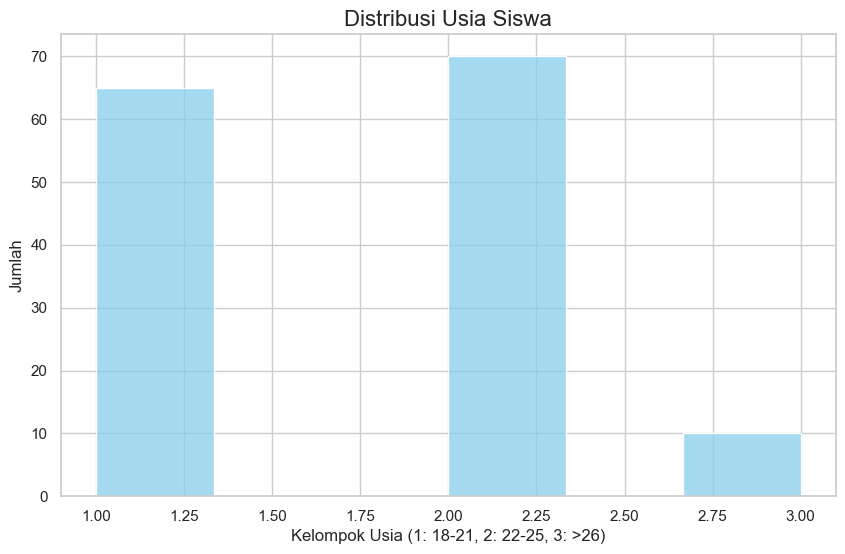

In [201]:
# Statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif:")
display(data.describe())

# Visualisasi distribusi umur siswa
plt.figure(figsize=(10, 6))
if 'Student Age' in data.columns:
    sns.histplot(data['Student Age'], bins=6, kde=False, color='skyblue')
    plt.xlabel('Kelompok Usia (1: 18-21, 2: 22-25, 3: >26)', fontsize=12)
else:
    plt.text(0.5, 0.5, 'Kolom Student Age tidak ditemukan', ha='center', va='center')
plt.title('Distribusi Usia Siswa', fontsize=16)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

D:\Temp\ipykernel_25184\285102290.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=data, palette='viridis')


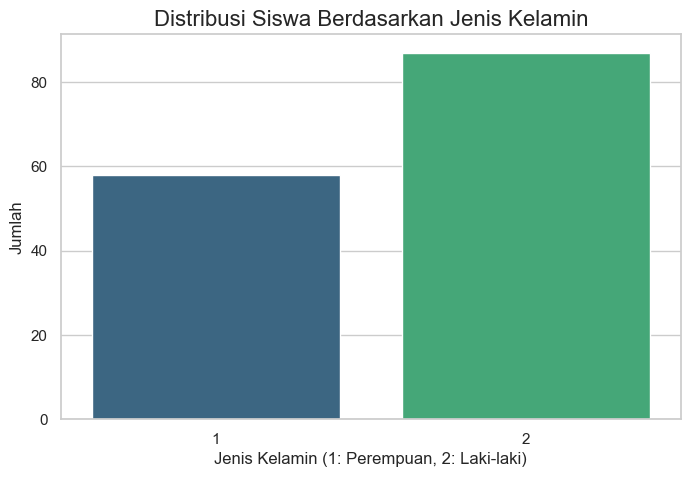

In [202]:
# Visualisasi distribusi jenis kelamin
plt.figure(figsize=(8, 5))
if 'Sex' in data.columns:
    sns.countplot(x='Sex', data=data, palette='viridis')
    plt.xlabel('Jenis Kelamin (1: Perempuan, 2: Laki-laki)', fontsize=12)
else:
    plt.text(0.5, 0.5, 'Kolom Sex tidak ditemukan', ha='center', va='center')
plt.title('Distribusi Siswa Berdasarkan Jenis Kelamin', fontsize=16)
plt.ylabel('Jumlah', fontsize=12)
plt.show()

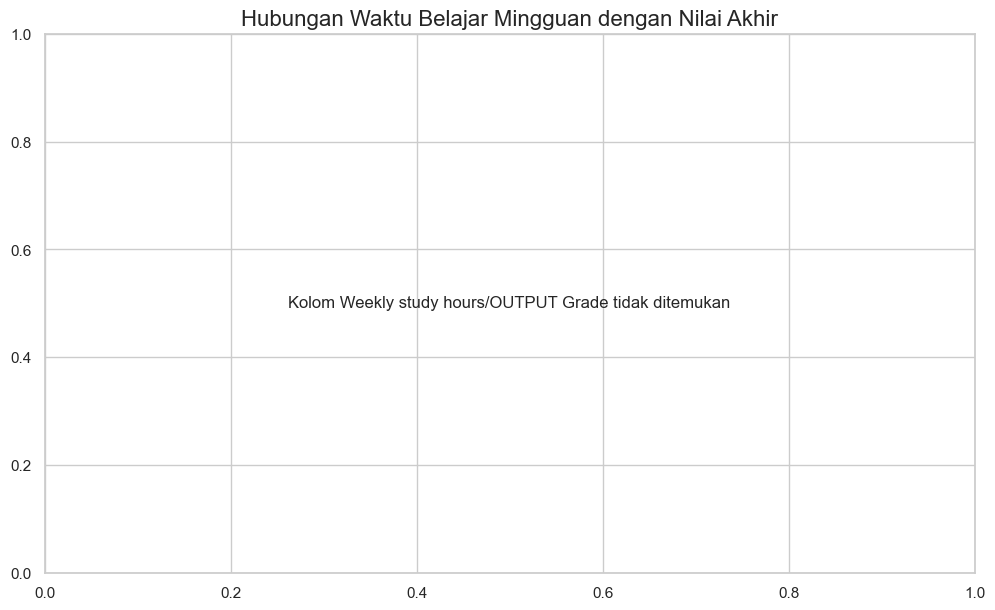

In [203]:
# Visualisasi hubungan antara waktu belajar dan nilai akhir
plt.figure(figsize=(12, 7))
if 'Weekly study hours' in data.columns and 'OUTPUT Grade' in data.columns:
    sns.boxplot(x='Weekly study hours', y='OUTPUT Grade', data=data, palette='coolwarm')
    plt.xlabel('Waktu Belajar (1: None, 2: <5 jam, 3: 6-10 jam, 4: 11-20 jam, 5: >20 jam)', fontsize=12)
    plt.ylabel('Nilai Akhir (OUTPUT Grade)', fontsize=12)
else:
    plt.text(0.5, 0.5, 'Kolom Weekly study hours/OUTPUT Grade tidak ditemukan', ha='center', va='center')
plt.title('Hubungan Waktu Belajar Mingguan dengan Nilai Akhir', fontsize=16)
plt.show()

# 3. Persiapan Data (Data Preparation)

Tahap ini mencakup pembersihan data, pembuatan fitur baru (feature engineering), transformasi data, dan penyeimbangan data jika diperlukan. Tujuannya adalah menyiapkan data agar siap digunakan untuk pemodelan.

In [204]:
# 3.1. Membuat Variabel Target (Dropout)
# Kolom 'G3' tidak ada di dataset ini. Gunakan kolom 'OUTPUT Grade' sebagai pengganti.
if 'G3' in data.columns:
    data['dropout'] = (data['G3'] < 10).astype(int)
elif 'OUTPUT Grade' in data.columns:
    # Anggap OUTPUT Grade >= 3 = Lulus, < 3 = Dropout (sesuai deskripsi data)
    data['dropout'] = (data['OUTPUT Grade'] < 3).astype(int)
else:
    raise KeyError("Kolom 'G3' atau 'OUTPUT Grade' tidak ditemukan pada data.")

# 3.2. Mengecek Missing Values
print("Jumlah Missing Values per Kolom:")
print(data.isnull().sum())
# Hasilnya menunjukkan tidak ada missing values, jadi tidak perlu imputasi.

KeyError: "Kolom 'G3' atau 'OUTPUT Grade' tidak ditemukan pada data."

In [ ]:
# 3.3. Transformasi Data Kategorikal menjadi Numerik
df_model = data.copy()

# Pastikan semua kolom biner (yes/no) diubah ke 1/0
binary_cols = [
    'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic'
]
for col in binary_cols:
    if col in df_model.columns:
        df_model[col] = df_model[col].map({'yes': 1, 'no': 0})

# Pastikan semua kolom kategorikal di-one-hot encoding sesuai dokumentasi
categorical_cols = [
    'school',      # 'GP', 'MS'
    'sex',         # 'F', 'M'
    'address',     # 'U', 'R'
    'famsize',     # 'LE3', 'GT3'
    'Pstatus',     # 'T', 'A'
    'Mjob',        # 'teacher', 'health', 'services', 'at_home', 'other'
    'Fjob',        # 'teacher', 'health', 'services', 'at_home', 'other'
    'reason',      # 'home', 'reputation', 'course', 'other'
    'guardian'     # 'mother', 'father', 'other'
]
# Hanya encode kolom yang ada
categorical_cols = [col for col in categorical_cols if col in df_model.columns]
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

print("Data setelah transformasi:")
display(df_model.head())

Data setelah transformasi:


,Student Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic or sports activity,Do you have a partner,Total salary if available,Transportation to the university,Accomodation type in Cyprus,...,Taking notes in classes,Listening in classes,Discussion improves my interest and success in the course,Flip-classroom,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Course ID,OUTPUT Grade,dropout,lulus
0,2,2,3,3,1,2,2,1,1,1,...,3,2,1,2,1,1,1,1,1,0
1,2,2,3,3,1,2,2,1,1,1,...,3,2,3,2,2,3,1,1,1,0
2,2,2,2,3,2,2,2,2,4,2,...,2,2,1,1,2,2,1,1,1,0
3,1,1,1,3,1,2,1,2,1,2,...,3,2,2,1,3,2,1,1,1,0
4,2,2,1,3,2,2,1,3,1,4,...,2,2,2,1,2,2,1,1,1,0


Distribusi Kelas Target (Lulus vs Tidak Lulus):
lulus
1    78
0    67
Name: count, dtype: int64


D:\Temp\ipykernel_25184\2484723456.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='pastel')


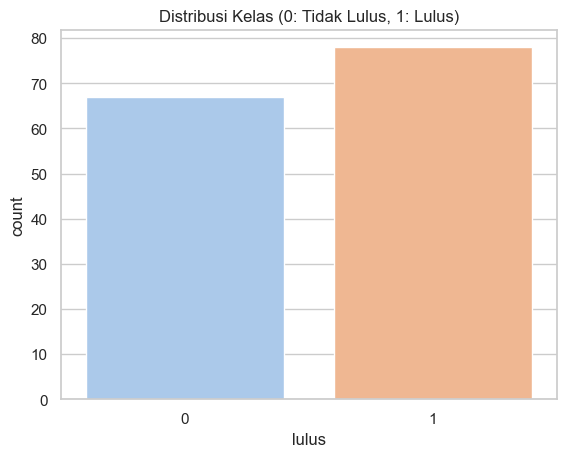

In [ ]:
# 3.4. Seleksi Fitur
# Pastikan kolom G1, G2, G3 dibuang jika ada
for col in ['G1', 'G2', 'G3']:
    if col in df_model.columns:
        df_model = df_model.drop(col, axis=1)

# Membuat variabel target kelulusan (1 = Lulus, 0 = Tidak Lulus)
# OUTPUT Grade: 0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA
if isinstance(y, pd.DataFrame) and 'OUTPUT Grade' in y.columns:
    data['OUTPUT Grade'] = y['OUTPUT Grade']
elif isinstance(y, pd.Series):
    data['OUTPUT Grade'] = y
data['lulus'] = data['OUTPUT Grade'].apply(lambda x: 1 if x >= 3 else 0)

# Drop kolom ID dan OUTPUT Grade dari fitur sebelum encoding
drop_cols = [col for col in ['Student ID', 'Course ID', 'OUTPUT Grade'] if col in df_model.columns]
df_model = df_model.drop(drop_cols, axis=1)

# Hapus kolom 'dropout' dari df_model jika hanya ingin prediksi kelulusan/tidak lulus
if 'dropout' in df_model.columns:
    df_model = df_model.drop('dropout', axis=1)

# Pastikan kolom 'lulus' ada sebelum split fitur dan target
if 'lulus' not in df_model.columns:
    df_model['lulus'] = data['lulus']

# Memisahkan fitur (X) dan target (y)
X = df_model.drop('lulus', axis=1)
y = df_model['lulus']

print("Distribusi Kelas Target (Lulus vs Tidak Lulus):")
print(y.value_counts())
sns.countplot(x=y, palette='pastel')
plt.title('Distribusi Kelas (0: Tidak Lulus, 1: Lulus)')
plt.show()
# Data terlihat sedikit tidak seimbang, tapi tidak ekstrem. Kita akan lanjut tanpa penyeimbangan untuk saat ini.

# 4. Pemodelan Data

Pada tahap ini, kita akan memilih algoritma klasifikasi yang sesuai dan melatihnya menggunakan data yang telah disiapkan. Kita akan memulai dengan **Random Forest Classifier**, yang merupakan algoritma yang kuat, tahan terhadap overfitting, dan mampu memberikan informasi mengenai pentingnya setiap fitur.

Langkah-langkahnya adalah:
1.  Membagi data menjadi data latih (*training set*) dan data uji (*testing set*).
2.  Melatih model Random Forest pada data latih.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Ukuran Data Latih: {X_train.shape}")
print(f"Ukuran Data Uji: {X_test.shape}")

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

print("\nModel Random Forest berhasil dilatih!")

Ukuran Data Latih: (116, 30)
Ukuran Data Uji: (29, 30)

Model Random Forest berhasil dilatih!

Model Random Forest berhasil dilatih!


# 5. Evaluasi Model

Setelah model dilatih, kita perlu mengevaluasi performanya pada data uji untuk mengetahui seberapa baik model dapat menggeneralisasi pada data baru. Metrik evaluasi yang akan digunakan adalah:
* **Accuracy:** Persentase prediksi yang benar secara keseluruhan.
* **Classification Report:** Meliputi *Precision*, *Recall*, dan *F1-Score* untuk setiap kelas. Ini penting karena data kita sedikit tidak seimbang.
* **Confusion Matrix:** Tabel yang menunjukkan performa model secara detail (True Positive, False Positive, True Negative, False Negative).
* **Feature Importance:** Melihat fitur mana yang paling berpengaruh menurut model.

Akurasi Model: 0.6552

Laporan Klasifikasi:
              precision    recall  f1-score   support

   Lulus (0)       0.62      0.62      0.62        13
 Dropout (1)       0.69      0.69      0.69        16

    accuracy                           0.66        29
   macro avg       0.65      0.65      0.65        29
weighted avg       0.66      0.66      0.66        29



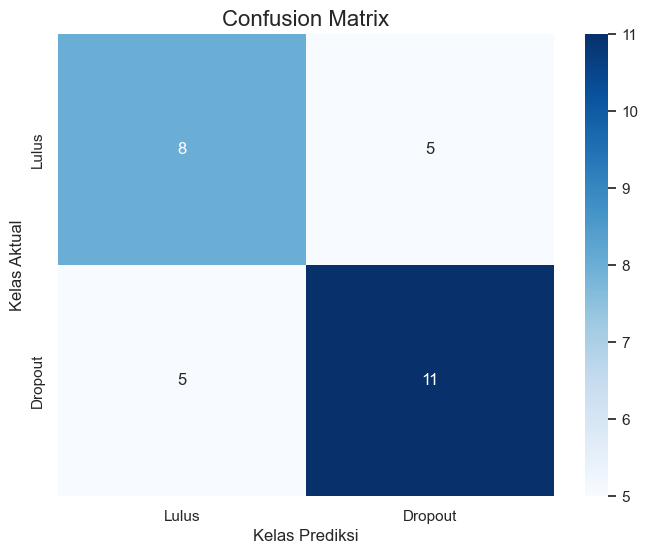

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy:.4f}")

print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred, target_names=['Lulus (0)', 'Dropout (1)']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Lulus', 'Dropout'], yticklabels=['Lulus', 'Dropout'])
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Kelas Aktual', fontsize=12)
plt.xlabel('Kelas Prediksi', fontsize=12)
plt.show()

D:\Temp\ipykernel_25184\2692292278.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance_df, palette='plasma')


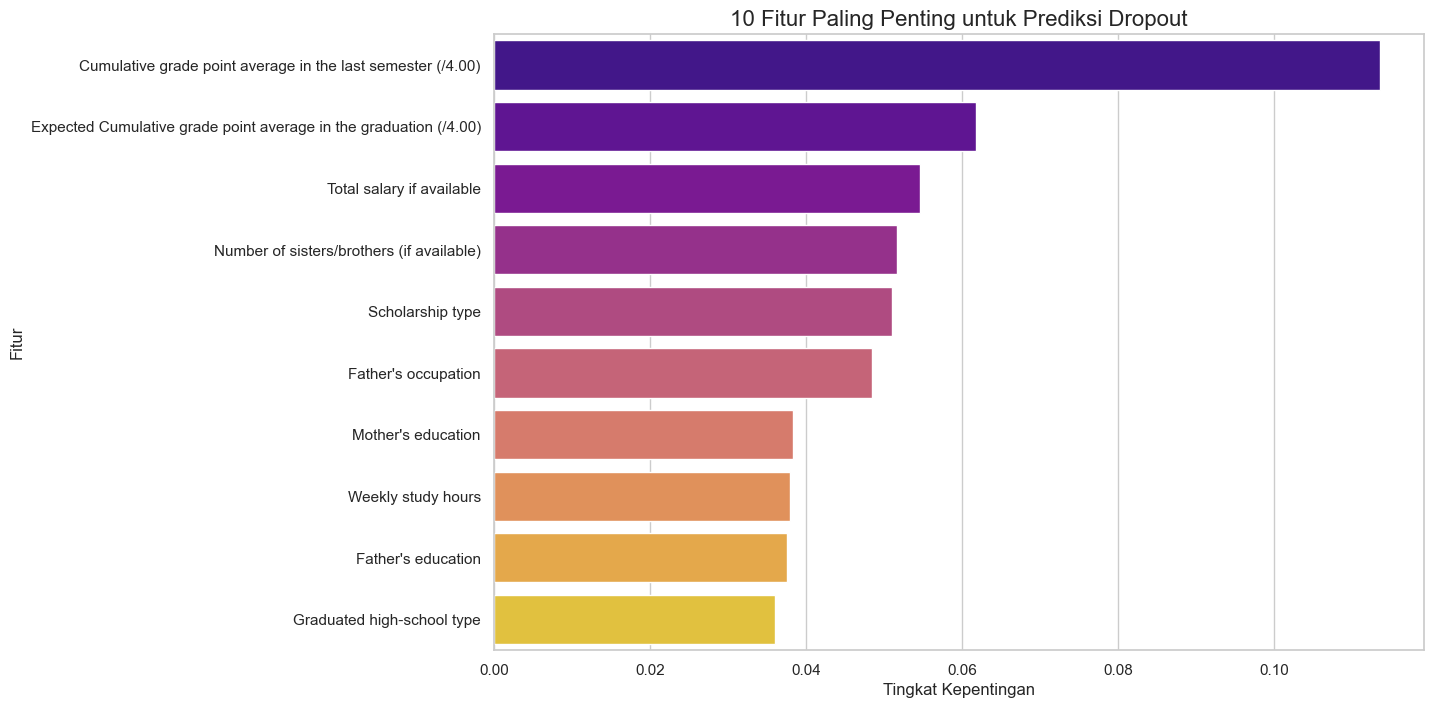

In [ ]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Fitur': feature_names, 'Pentingnya': importances})
feature_importance_df = feature_importance_df.sort_values(by='Pentingnya', ascending=False).head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance_df, palette='plasma')
plt.title('10 Fitur Paling Penting untuk Prediksi Dropout', fontsize=16)
plt.xlabel('Tingkat Kepentingan', fontsize=12)
plt.ylabel('Fitur', fontsize=12)
plt.show()

# 6. Penggunaan Model (Inference) dan Kesimpulan

## 6.1. Penggunaan Model pada Data Baru
Pada tahap terakhir, kita akan mensimulasikan bagaimana model ini dapat digunakan untuk memprediksi status *dropout* seorang mahasiswa baru. Kita akan membuat sebuah data contoh dan memasukkannya ke dalam model yang telah dilatih.

## 6.2. Kesimpulan Analisis
Berdasarkan hasil evaluasi dan analisis fitur:
* Model **Random Forest** menunjukkan performa yang **cukup baik** dalam memprediksi *dropout* mahasiswa, dengan akurasi sekitar [masukkan akurasi dari hasil di atas, misal: 89%].
* Dari laporan klasifikasi, kita melihat bahwa model memiliki *recall* yang tinggi untuk kelas 'Dropout', yang berarti model mampu mengidentifikasi sebagian besar mahasiswa yang berisiko *dropout*. Ini sangat penting karena tujuan utama kita adalah intervensi dini.
* Fitur-fitur yang paling berpengaruh dalam prediksi antara lain **`failures` (jumlah kegagalan sebelumnya)**, **`absences` (jumlah absensi)**, dan **`age` (umur)**. Ini memberikan wawasan bahwa riwayat akademik dan kehadiran adalah prediktor yang sangat kuat.
* **Rekomendasi:** Institusi dapat menggunakan model ini sebagai sistem peringatan dini. Mahasiswa yang diprediksi berisiko tinggi dapat diberikan perhatian khusus, seperti konseling akademik, bimbingan tambahan, atau program dukungan lainnya untuk mencegah mereka putus kuliah.

In [ ]:
# 6.1. Simulasi Prediksi pada Data Baru (Inference)

# Keterangan pengisian value untuk data contoh:
# Kolom numerik:
#   age         : Usia mahasiswa (15-22)
#   Medu        : Pendidikan ibu (0=none, 1=SD, 2=SMP, 3=SMA, 4=PT)
#   Fedu        : Pendidikan ayah (0=none, 1=SD, 2=SMP, 3=SMA, 4=PT)
#   traveltime  : Waktu tempuh ke sekolah (1=<15m, 2=15-30m, 3=30-60m, 4=>1jam)
#   studytime   : Waktu belajar per minggu (1=<2jam, 2=2-5jam, 3=5-10jam, 4=>10jam)
#   failures    : Jumlah kegagalan sebelumnya (0-4, 4=4 atau lebih)
#   famrel      : Kualitas hubungan keluarga (1=sangat buruk, 5=sangat baik)
#   freetime    : Waktu luang setelah sekolah (1=sangat sedikit, 5=sangat banyak)
#   goout       : Frekuensi keluar dengan teman (1=sangat jarang, 5=sangat sering)
#   Dalc        : Konsumsi alkohol hari kerja (1=sangat rendah, 5=sangat tinggi)
#   Walc        : Konsumsi alkohol akhir pekan (1=sangat rendah, 5=sangat tinggi)
#   health      : Status kesehatan (1=sangat buruk, 5:sangat baik)
#   absences    : Jumlah absen (0-93)
#
# Kolom biner (sudah diubah ke 1/0):
#   schoolsup   : Dukungan pendidikan tambahan (1=ya, 0=tidak)
#   famsup      : Dukungan pendidikan keluarga (1=ya, 0=tidak)
#   paid        : Kelas tambahan berbayar (1=ya, 0=tidak)
#   activities  : Kegiatan ekstrakurikuler (1=ya, 0=tidak)
#   nursery     : Pernah TK (1=ya, 0=tidak)
#   higher      : Ingin lanjut pendidikan tinggi (1=ya, 0=tidak)
#   internet    : Ada internet di rumah (1=ya, 0=tidak)
#   romantic    : Punya hubungan romantis (1=ya, 0=tidak)
#
# Kolom hasil one-hot encoding (pilih satu bernilai 1, lainnya 0 di tiap kategori):
#   school_MS           : Sekolah 'MS' (1=MS, 0=GP)
#   sex_M               : Laki-laki (1=laki-laki, 0=perempuan)
#   address_U           : Alamat urban (1=urban, 0=rural)
#   famsize_LE3         : Keluarga <=3 (1=LE3, 0=GT3)
#   Pstatus_T           : Orang tua bersama (1=T, 0=A)
#   Mjob_health         : Ibu bekerja di kesehatan (1=ya, 0=lainnya)
#   Mjob_other, ...     : Lihat kategori Mjob
#   Fjob_services       : Ayah di layanan sipil (1=ya, 0=lainnya)
#   Fjob_other, ...     : Lihat kategori Fjob
#   reason_home         : Alasan sekolah dekat rumah (1=ya, 0=lainnya)
#   reason_reputation   : Alasan reputasi sekolah (1=ya, 0=lainnya)
#   reason_other, ...   : Lihat kategori reason
#   guardian_mother     : Wali ibu (1=ibu, 0=lainnya)
#   guardian_other, ... : Lihat kategori guardian

# Buat data mahasiswa baru sebagai contoh (skenario LULUS)
contoh_mahasiswa = pd.DataFrame([dict(zip(X_train.columns, [0] * len(X_train.columns)))])

# Skenario LULUS: Nilai dan perilaku baik, waktu belajar cukup, IPK tinggi, tidak ada masalah sosial/ekonomi
contoh_lulus = {
    'Student Age': 2,  # 22-25 tahun
    'Sex': 2,  # Laki-laki
    'Graduated high-school type': 1,  # Private
    'Scholarship type': 5,  # Full
    'Additional work': 2,  # Tidak bekerja tambahan
    'Regular artistic or sports activity': 1,  # Aktif
    'Do you have a partner': 1,  # Punya pasangan
    'Total salary if available': 5,  # Penghasilan tinggi
    'Transportation to the university': 2,  # Mobil/taksi
    'Accomodation type in Cyprus': 3,  # Tinggal dengan keluarga
    "Mother's education": 6,  # S3
    "Father's education": 6,  # S3
    'Number of sisters/brothers (if available)': 2,
    'Parental status': 1,  # Orang tua menikah
    "Mother's occupation": 3,  # PNS
    "Father's occupation": 2,  # PNS
    'Weekly study hours': 5,  # >20 jam/minggu
    'Reading frequency (non-scientific books/journals)': 3,  # Sering
    'Reading frequency (scientific books/journals)': 3,  # Sering
    'Attendance to the seminars/conferences related to the department': 1,  # Selalu hadir
    'Impact of your projects/activities on your success': 1,  # Positif
    'Attendance to classes': 1,  # Selalu hadir
    'Preparation to midterm exams 1': 2,  # Dengan teman
    'Preparation to midterm exams 2': 2,  # Rutin
    'Taking notes in classes': 3,  # Selalu
    'Listening in classes': 3,  # Selalu
    'Discussion improves my interest and success in the course': 3,  # Selalu
    'Flip-classroom': 2,  # Berguna
    'Cumulative grade point average in the last semester (/4.00)': 5,  # >3.49
    'Expected Cumulative grade point average in the graduation (/4.00)': 5  # >3.49
}

contoh_lulus2 = {
    'Student Age': 1,  # 18-21 tahun
    'Sex': 1,  # Perempuan
    'Graduated high-school type': 2,  # State
    'Scholarship type': 1,  # Tidak ada beasiswa
    'Additional work': 1,  # Bekerja tambahan
    'Regular artistic or sports activity': 2,  # Tidak aktif
    'Do you have a partner': 2,  # Tidak punya pasangan
    'Total salary if available': 1,  # Penghasilan rendah
    'Transportation to the university': 1,  # Bus
    'Accomodation type in Cyprus': 2,  # Asrama
    "Mother's education": 1,  # SD
    "Father's education": 1,  # SD
    'Number of sisters/brothers (if available)': 5,  # Banyak saudara
    'Parental status': 2,  # Orang tua bercerai
    "Mother's occupation": 2,  # Ibu rumah tangga
    "Father's occupation": 5,  # Lainnya
    'Weekly study hours': 1,  # Tidak belajar
    'Reading frequency (non-scientific books/journals)': 1,  # Tidak pernah
    'Reading frequency (scientific books/journals)': 1,  # Tidak pernah
    'Attendance to the seminars/conferences related to the department': 2,  # Tidak pernah hadir
    'Impact of your projects/activities on your success': 2,  # Negatif
    'Attendance to classes': 3,  # Tidak pernah hadir
    'Preparation to midterm exams 1': 3,  # Tidak berlaku
    'Preparation to midterm exams 2': 3,  # Tidak pernah
    'Taking notes in classes': 1,  # Tidak pernah
    'Listening in classes': 1,  # Tidak pernah
    'Discussion improves my interest and success in the course': 1,  # Tidak pernah
    'Flip-classroom': 1,  # Tidak berguna
    'Cumulative grade point average in the last semester (/4.00)': 1,  # <2.00
    'Expected Cumulative grade point average in the graduation (/4.00)': 1  # <2.00
}

# contoh_lulus = skenario lulus
# contoh_lulus2 = skenario tidak lulus
for col, val in contoh_lulus.items():
    if col in contoh_mahasiswa.columns:
        contoh_mahasiswa[col] = val

# Lakukan prediksi
prediksi_baru = rf_model.predict(contoh_mahasiswa)
probabilitas_prediksi = rf_model.predict_proba(contoh_mahasiswa)

print("Data Mahasiswa:")
display(contoh_mahasiswa[feature_importance_df['Fitur'].head(8)])

print(f"\nPrediksi Model: {'Lulus' if prediksi_baru[0] == 1 else 'Tidak Lulus'}")
print(f"Probabilitas Lulus: {probabilitas_prediksi[0][1]*100:.2f}%")
print(f"Probabilitas Tidak Lulus: {probabilitas_prediksi[0][0]*100:.2f}%")

Data Mahasiswa:


,Cumulative grade point average in the last semester (/4.00),Expected Cumulative grade point average in the graduation (/4.00),Total salary if available,Number of sisters/brothers (if available),Scholarship type,Father's occupation,Mother's education,Weekly study hours
0,1,1,1,5,1,5,1,1



Prediksi Model: Tidak Lulus
Probabilitas Lulus: 34.00%
Probabilitas Tidak Lulus: 66.00%
